IRONHACK - FINAL PROJECT

PROJECT TITILE: Predicting and Understanding Employee Absenteeism Using Machine Learning.

BUSINESS GOAL: To develop a predictive model that estimates the number of hours an employee is likely to be absent based on various personal, workplace, and health-related features.

DATASET: Employee Absenteeism, from Kaggle.
- SUPERVISED ML PROJECT

Dataset Overview: Employee Absenteeism at Work
- This dataset records employee absence behavior at a Brazilian courier company over a period of several years. It aims to understand which factors influence how often and how long employees are absent from work. It's widely used in HR analytics to support productivity optimization, health policy planning, and absentee cost reduction.

Dataset Characteristics
- Size: 740 records × 21 columns
- Task Type: Primarily regression (predicting Absenteeism time in hours)
     - Can also support classification (e.g., low/medium/high absenteeism)
- Data Source: Real-world HR records from a courier company
- Target Variable: Absenteeism time in hours
- Balanced: The target is continuous and not heavily skewed
- Feature Types:
     - Categorical: Reason for absence, Season, Day of week, Education, etc.
     - Numerical: Age, Workload, Distance, etc.
     - Binary: Social drinker, Disciplinary failure, Social smoker

BUSINESS QUESTIONS:
1. Can we predict how many hours an employee will be absent based on their work and health profile? (Regression)
2. Which factors most strongly influence employee absenteeism?
3. Are there patterns in absenteeism by day of week, season, or distance from work?
4. Do health-related reasons (e.g., diseases, accidents) explain most absences?
5. Can we classify employees into low, medium, and high absenteeism risk categories?
6. Does absenteeism vary significantly across departments, education levels, or job roles?
7. Are certain employees abusing the system (e.g., frequent short absences)? 

DATA LOADING AND CLEANING

In [2]:
# Setting up the library imports for data analysis and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv(r'C:\Users\diplo\Desktop\Ind_Project\Final_Project\Absenteeism_at_work_Project.csv')

In [4]:
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,"239,554",...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,"239,554",...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,"239,554",...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,"239,554",...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,"239,554",...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [5]:
data.tail()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
735,11,14.0,7.0,3,1,289.0,36.0,13.0,33.0,"264,604",...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,8.0
736,1,11.0,7.0,3,1,235.0,11.0,14.0,37.0,"264,604",...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,4.0
737,4,0.0,0.0,3,1,118.0,14.0,13.0,40.0,"271,219",...,0.0,1.0,1.0,1.0,0.0,8.0,98.0,170.0,34.0,0.0
738,8,0.0,0.0,4,2,231.0,35.0,14.0,39.0,"271,219",...,0.0,1.0,2.0,1.0,0.0,2.0,100.0,170.0,35.0,0.0
739,35,0.0,0.0,6,3,179.0,45.0,14.0,53.0,"271,219",...,0.0,1.0,1.0,0.0,0.0,1.0,77.0,175.0,25.0,0.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               737 non-null    float64
 2   Month of absence                 739 non-null    float64
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           733 non-null    float64
 6   Distance from Residence to Work  737 non-null    float64
 7   Service time                     737 non-null    float64
 8   Age                              737 non-null    float64
 9   Work load Average/day            730 non-null    object 
 10  Hit target                       734 non-null    float64
 11  Disciplinary failure             734 non-null    float64
 12  Education             

In [7]:
# Clean the "Work load Average/day " Column. The values have commas and need to be converted from strings to floats.
data['Work load Average/day '] = data['Work load Average/day '].str.replace(',', '')
data['Work load Average/day '] = data['Work load Average/day '].astype(float)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               737 non-null    float64
 2   Month of absence                 739 non-null    float64
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           733 non-null    float64
 6   Distance from Residence to Work  737 non-null    float64
 7   Service time                     737 non-null    float64
 8   Age                              737 non-null    float64
 9   Work load Average/day            730 non-null    float64
 10  Hit target                       734 non-null    float64
 11  Disciplinary failure             734 non-null    float64
 12  Education             

In [9]:
data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,737.000000,739.000000,740.000000,740.000000,733.000000,737.000000,737.000000,737.000000,730.000000,...,734.000000,730.000000,734.000000,737.000000,736.000000,738.000000,739.000000,726.000000,709.000000,718.000000
mean,18.017568,19.188602,6.319350,3.914865,2.544595,221.035471,29.667571,12.565807,36.449118,271188.860274,...,0.053134,1.295890,1.017711,0.567164,0.073370,0.746612,79.063599,172.152893,26.684062,6.977716
std,11.021247,8.437493,3.435948,1.421675,1.111831,66.954179,14.848124,4.389813,6.480148,38981.880873,...,0.224453,0.676965,1.094928,0.495805,0.260919,1.319726,12.868630,6.081065,4.292819,13.476962
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,284853.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [10]:
# Check how many missing values per column
data.isnull().sum().sort_values(ascending=False)

Body mass index                    31
Absenteeism time in hours          22
Height                             14
Work load Average/day              10
Education                          10
Transportation expense              7
Son                                 6
Disciplinary failure                6
Hit target                          6
Social smoker                       4
Age                                 3
Reason for absence                  3
Service time                        3
Distance from Residence to Work     3
Social drinker                      3
Pet                                 2
Weight                              1
Month of absence                    1
Seasons                             0
Day of the week                     0
ID                                  0
dtype: int64

In [11]:
# Drop Missing Target Rows; dropped rows where the target column (Absenteeism time in hours) is missing, otherwise i can’t train the model.
data = data.dropna(subset=['Absenteeism time in hours'])

# Confirm the drop worked
data['Absenteeism time in hours'].isnull().sum()


0

In [12]:
# Differentiate between numerical and categorical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
# Print the numerical and categorical columns
print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['ID', 'Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']
Categorical Columns: []


In [13]:
# Separate true categorical columns from numerical ones
cat_cols = [
    'Reason for absence',         # 0–28
    'Month of absence',           # 1–12
    'Day of the week',            # 2–6
    'Seasons',                    # 1–4
    'Education',                  # 1–4
    'Disciplinary failure',       # 0–1
    'Social drinker',             # 0–1
    'Social smoker',              # 0–1
    'Pet',                        # Discrete count
    'Son'                         # Discrete count
]


In [14]:
# Separate numerical vs categorical columns for EDA
numerical_cols = [col for col in data.columns if col not in cat_cols and col != 'Absenteeism time in hours']
categorical_cols = cat_cols
target_col = 'Absenteeism time in hours'

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['ID', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Weight', 'Height', 'Body mass index']
Categorical Columns: ['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Education', 'Disciplinary failure', 'Social drinker', 'Social smoker', 'Pet', 'Son']


EXPLORATORY DATA ANALYSIS (EDA)

In [15]:
# Set Seaborn style
sns.set(style='whitegrid', palette='husl')

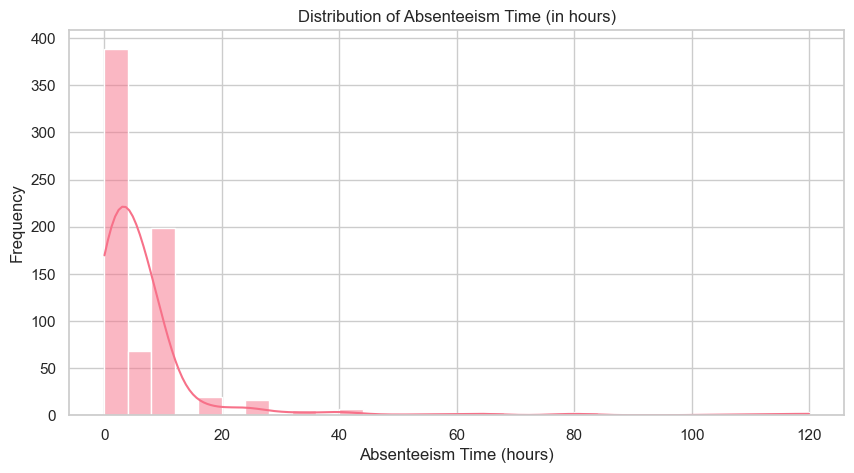

In [16]:
#Let’s see how Absenteeism time in hours is distributed.
plt.figure(figsize=(10, 5))
sns.histplot(data['Absenteeism time in hours'], bins=30, kde=True)
plt.title('Distribution of Absenteeism Time (in hours)')
plt.xlabel('Absenteeism Time (hours)')
plt.ylabel('Frequency')
plt.show()


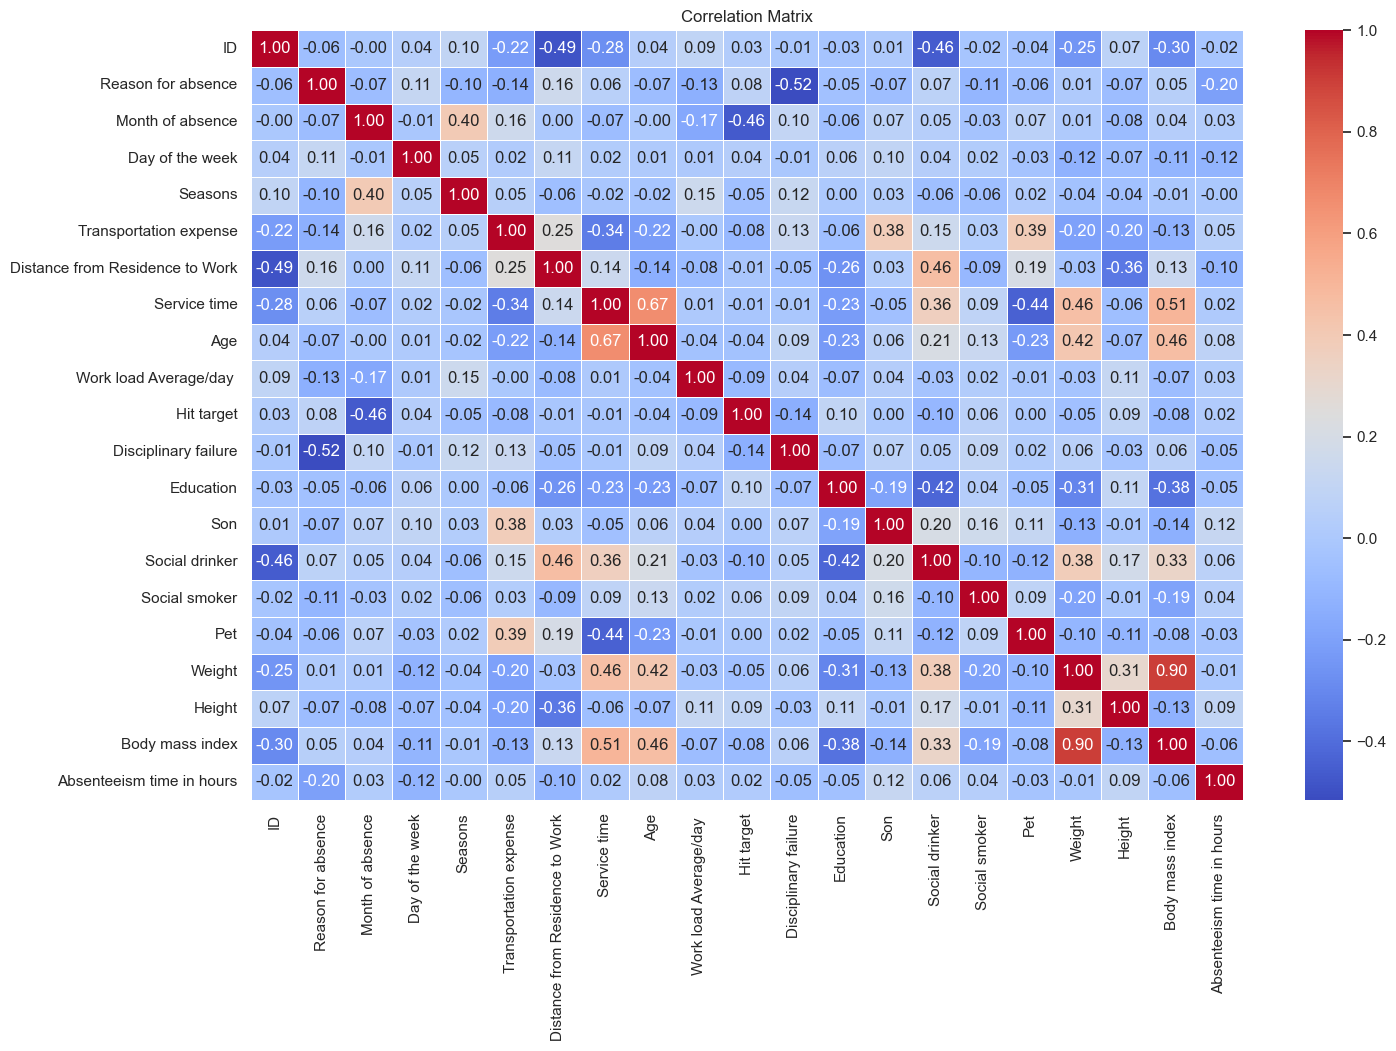

In [17]:
# To show how strongly each numerical feature is related to absentee hours.
plt.figure(figsize=(16, 10))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


No feature has a strong correlation (> 0.3) with absenteeism, but some still show mild patterns worth exploring further.

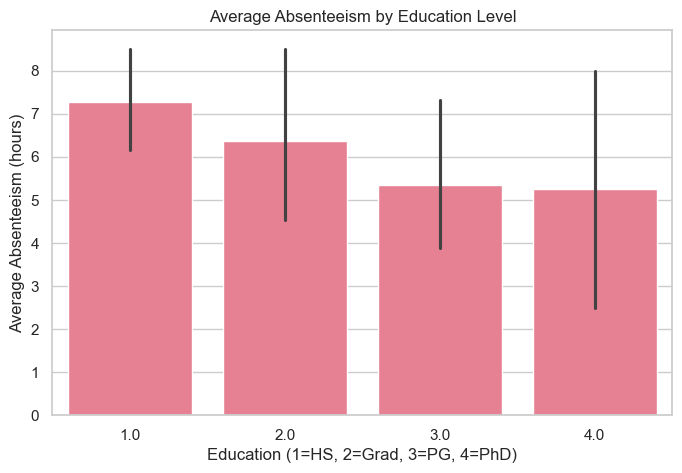

In [18]:
# Categorical Feature Analysis
# Let's analyze the relationship between 'Education' and absenteeism time
plt.figure(figsize=(8, 5))
sns.barplot(data=data, x='Education', y='Absenteeism time in hours')
plt.title('Average Absenteeism by Education Level')
plt.xlabel('Education (1=HS, 2=Grad, 3=PG, 4=PhD)')
plt.ylabel('Average Absenteeism (hours)')
plt.show()


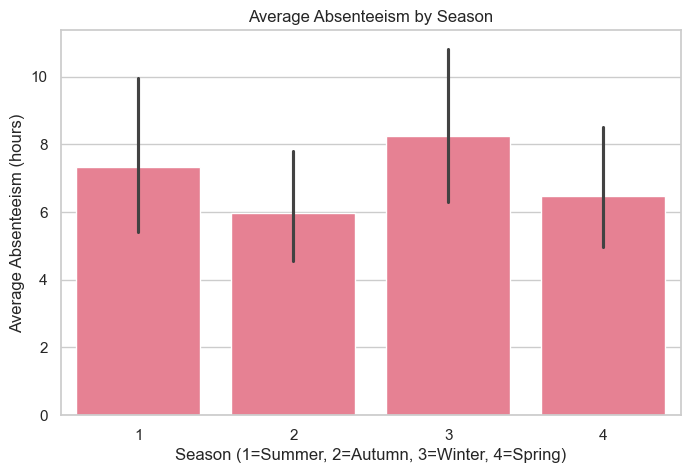

In [19]:
# Average Absenteeism by Season
plt.figure(figsize=(8, 5))
sns.barplot(data=data, x='Seasons', y='Absenteeism time in hours')
plt.title('Average Absenteeism by Season')
plt.xlabel('Season (1=Summer, 2=Autumn, 3=Winter, 4=Spring)')
plt.ylabel('Average Absenteeism (hours)')
plt.show()


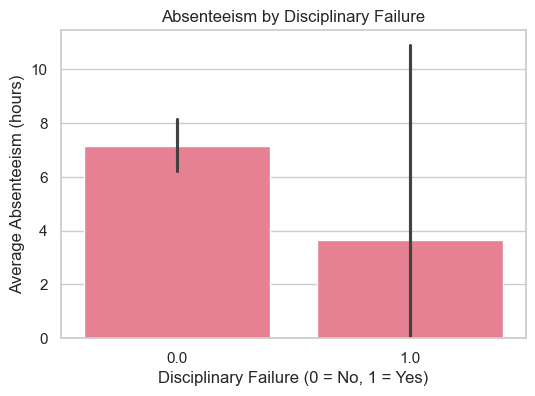

In [20]:
# Absenteeism By Disciplinary Failure
plt.figure(figsize=(6, 4))
sns.barplot(data=data, x='Disciplinary failure', y='Absenteeism time in hours')
plt.title('Absenteeism by Disciplinary Failure')
plt.xlabel('Disciplinary Failure (0 = No, 1 = Yes)')
plt.ylabel('Average Absenteeism (hours)')
plt.show()


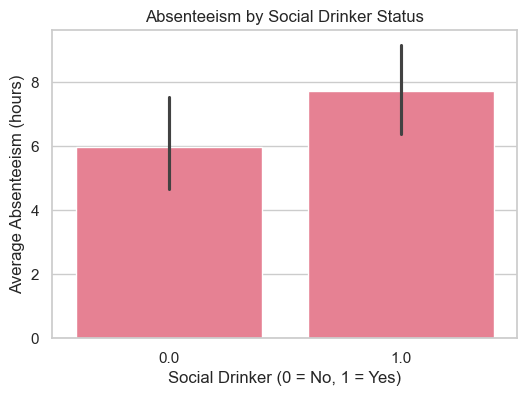

In [21]:
# Absenteeism By Social Drinker
plt.figure(figsize=(6, 4))
sns.barplot(data=data, x='Social drinker', y='Absenteeism time in hours')
plt.title('Absenteeism by Social Drinker Status')
plt.xlabel('Social Drinker (0 = No, 1 = Yes)')
plt.ylabel('Average Absenteeism (hours)')
plt.show()


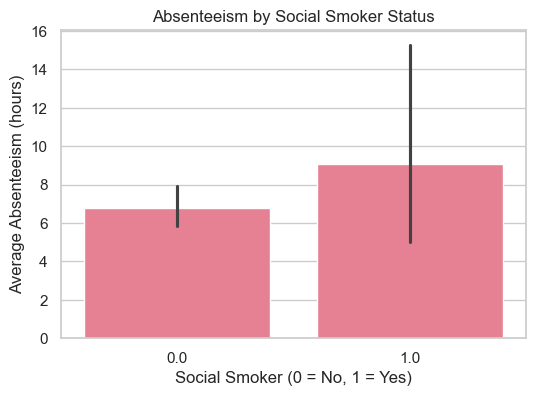

In [22]:
# Absenteeism By Social Smoker
plt.figure(figsize=(6, 4))
sns.barplot(data=data, x='Social smoker', y='Absenteeism time in hours')
plt.title('Absenteeism by Social Smoker Status')
plt.xlabel('Social Smoker (0 = No, 1 = Yes)')
plt.ylabel('Average Absenteeism (hours)')
plt.show()

FEATURE ENGINEERING

In [23]:
# Group “Reason for Absence” into Categories
# Instead of 28+ individual reasons, I’ll group them into 4 main categories based on UCI’s metadata
def reason_group(reason_code):
    if 1 <= reason_code <= 14:
        return 1  # Disease-related
    elif 15 <= reason_code <= 17:
        return 2  # Pregnancy / Family
    elif 18 <= reason_code <= 21:
        return 3  # Work / Travel
    elif 22 <= reason_code <= 28:
        return 4  # Other
    else:
        return 0  # No absence (code 0)

# Create a new column
data['Reason_group'] = data['Reason for absence'].apply(reason_group)

# Check result
data[['Reason for absence', 'Reason_group']].head()


,Reason for absence,Reason_group
0,26.0,4
1,0.0,0
2,23.0,4
3,7.0,1
4,23.0,4


In [24]:
# Create a Risk Category for Absenteeism
# Classify absentee hours into Low, Medium, and High categories.
# This is to enable classification modeling in addition to regression.
def risk_level(hours):
    if hours <= 8:
        return 'Low'
    elif hours <= 16:
        return 'Medium'
    else:
        return 'High'

data['Absenteeism_level'] = data['Absenteeism time in hours'].apply(risk_level)

# Check value counts
data['Absenteeism_level'].value_counts()


Absenteeism_level
Low       656
High       43
Medium     19
Name: count, dtype: int64

In [25]:
# Drop irrelevant/redundant columns
data_model = data.drop(['ID', 'Reason for absence'], axis=1)


CLASSIFIACTION MODEL;  To predict whether an employee has a Low, Medium, or High absenteeism level.

In [26]:
# Features and target
X = data_model.drop(['Absenteeism time in hours', 'Absenteeism_level'], axis=1)
y = data_model['Absenteeism_level']

# Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (574, 19)
Test size: (144, 19)


In [27]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data only, then transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train model
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_scaled, y_train)

# Predict
y_pred = rf_clf.predict(X_test_scaled)

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

        High       0.00      0.00      0.00         9
         Low       0.91      0.98      0.95       131
      Medium       0.00      0.00      0.00         4

    accuracy                           0.90       144
   macro avg       0.30      0.33      0.32       144
weighted avg       0.83      0.90      0.86       144

Confusion Matrix:
 [[  0   9   0]
 [  1 129   1]
 [  0   4   0]]


Predicted →    High   Low   Medium
Actual ↓
High            0     9      0
Low             1    129     1
Medium          0     4      0
The model is biased toward the majority class: Low absenteeism. There are too few "High" and "Medium" examples for the model to learn patterns, which results to a SEVERE CLASS IMBALANCE

In [29]:
# Fixing Class Imbalance
y.value_counts()


Absenteeism_level
Low       656
High       43
Medium     19
Name: count, dtype: int64

In [30]:
# Check missing values in the original X_train (before scaling)
pd.DataFrame(X_train).isnull().sum().sort_values(ascending=False)


Body mass index                    23
Height                             11
Education                           9
Work load Average/day               7
Son                                 6
Hit target                          5
Disciplinary failure                4
Transportation expense              4
Social drinker                      3
Pet                                 2
Distance from Residence to Work     2
Service time                        2
Social smoker                       2
Weight                              1
Month of absence                    1
Day of the week                     0
Age                                 0
Seasons                             0
Reason_group                        0
dtype: int64

In [31]:
from sklearn.impute import SimpleImputer

# Create imputer (mean strategy)
imputer = SimpleImputer(strategy='mean')

# Fit and transform both training and testing sets
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale the imputed values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


In [32]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train_scaled, y_train)

# Confirm it's balanced
print(y_train_balanced.value_counts())


Absenteeism_level
Low       525
Medium    525
High      525
Name: count, dtype: int64


c:\Users\diplo\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\diplo\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\diplo\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\diplo\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\diplo\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

Retrain the Classifier on Balanced Data

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train on balanced data
rf_clf_balanced = RandomForestClassifier(random_state=42)
rf_clf_balanced.fit(X_train_balanced, y_train_balanced)

# Predict on original (unbalanced) test set
y_pred_balanced = rf_clf_balanced.predict(X_test_scaled)

# Evaluate
print("Balanced Classification Report:\n", classification_report(y_test, y_pred_balanced))
print("Balanced Confusion Matrix:\n", confusion_matrix(y_test, y_pred_balanced))


Balanced Classification Report:
               precision    recall  f1-score   support

        High       0.25      0.22      0.24         9
         Low       0.93      0.95      0.94       131
      Medium       0.00      0.00      0.00         4

    accuracy                           0.88       144
   macro avg       0.39      0.39      0.39       144
weighted avg       0.86      0.88      0.87       144

Balanced Confusion Matrix:
 [[  2   6   1]
 [  6 124   1]
 [  0   4   0]]


What Improved:
- High class is now being predicted, and not completely ignored.
- Still maintaining strong results for Low class.

What’s Not Working Yet:
- Medium is still not being predicted at all. Likely due to too few examples (only 4 in test set) or no distinct pattern in features.
- Class overlap in feature space might be too high.

TRAIN XGBOOST CLASSIFIER: Since it handles imbalance well

In [34]:
!pip install xgboost

In [35]:
# Convert Target Labels to Numbers
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
y_train_balanced_encoded = le.fit_transform(y_train_balanced)
y_test_encoded = le.transform(y_test)


In [36]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_balanced, y_train_balanced_encoded)

# Predict
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Decode predictions back to labels
y_pred_xgb_labels = le.inverse_transform(y_pred_xgb)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb_labels))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_labels))


c:\Users\diplo\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:17:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classification Report:
               precision    recall  f1-score   support

        High       0.50      0.33      0.40         9
         Low       0.93      0.97      0.95       131
      Medium       0.00      0.00      0.00         4

    accuracy                           0.90       144
   macro avg       0.48      0.43      0.45       144
weighted avg       0.88      0.90      0.89       144

XGBoost Confusion Matrix:
 [[  3   5   1]
 [  3 127   1]
 [  0   4   0]]


- "High" class got a decent bump (33% recall, 50% precision), which is a huge win over the previous models.
- "Low" is still very strong (as expected).
- "Medium" still has 0s — likely due to too few training examples or overlapping features.

C:\Users\diplo\AppData\Local\Temp\ipykernel_16476\3540313785.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_df.head(10), x='Importance', y='Feature', palette='viridis')


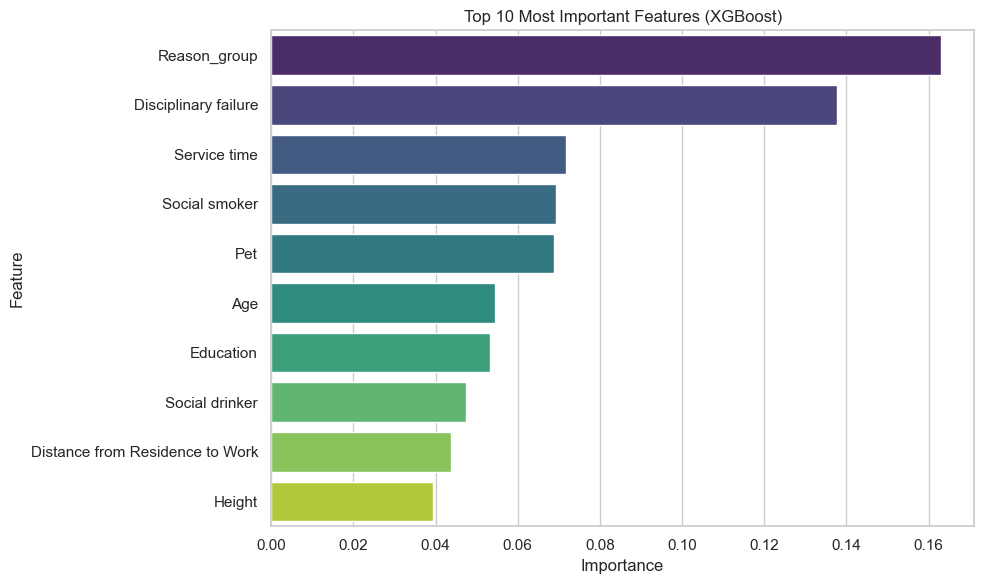

In [37]:
# Feature Importance with XGBoost
# What features are driving absenteeism?

# Get feature importances
importance = xgb_model.feature_importances_
feature_names = X.columns

# Create DataFrame for plotting
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot Top 10
plt.figure(figsize=(10,6))
sns.barplot(data=feat_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Most Important Features (XGBoost)")
plt.tight_layout()
plt.show()


Logistics Regression on Balanced Dataset using Multinomial

In [38]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression 
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
logreg.fit(X_train_balanced, y_train_balanced_encoded)


c:\Users\diplo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [39]:
# Predict on test set
y_pred_logreg = logreg.predict(X_test_scaled)

# Convert back to readable labels
y_pred_logreg_labels = le.inverse_transform(y_pred_logreg)

# Evaluate
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg_labels))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg_labels))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

        High       0.18      0.56      0.27         9
         Low       0.96      0.69      0.80       131
      Medium       0.05      0.25      0.08         4

    accuracy                           0.67       144
   macro avg       0.39      0.50      0.38       144
weighted avg       0.88      0.67      0.75       144

Logistic Regression Confusion Matrix:
 [[ 5  2  2]
 [22 90 19]
 [ 1  2  1]]


- High class now gets more recall (56%) than in previous models, but very low precision. It predicts many false Highs.
- Low performance dropped from 95% (RandomForest/XGBoost) to 69%.
- Medium is still weak (due to small class size).

Logistic Regression offered higher recall for 'High' absenteeism but at the cost of significantly lower overall accuracy and precision. XGBoost gave the best overall balance, making it the most suitable for deployment

COMPARISON TABLE

| Metric                | Random Forest | XGBoost | Logistic Regression |
| --------------------- | ------------- | ------- | ------------------- |
| **Accuracy**          | 90%           | **90%** | 67%                 |
| **Recall (Low)**      | 95%           | **97%** | 69%                 |
| **Recall (Medium)**   | 0%            | 0%      | **25%**             |
| **Recall (High)**     | 22%           | **33%** | **56%**             |
| **F1-Score (Low)**    | 94%           | **95%** | 80%                 |
| **F1-Score (High)**   | 24%           | **40%** | 27%                 |
| **F1-Score (Medium)** | 0%            | 0%      | **8%**              |


In [40]:
# Final Model Training and Evaluation
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Label encode target
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train_balanced)
y_test_enc = le.transform(y_test)

# Initialize and train
final_model = XGBClassifier(random_state=42, eval_metric='mlogloss')
final_model.fit(X_train_balanced, y_train_enc)

# Predict
y_pred_final = final_model.predict(X_test_scaled)
y_pred_final_labels = le.inverse_transform(y_pred_final)

# Evaluation
print("Final XGBoost Classification Report:")
print(classification_report(y_test, y_pred_final_labels))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_final_labels))


Final XGBoost Classification Report:
              precision    recall  f1-score   support

        High       0.50      0.33      0.40         9
         Low       0.93      0.97      0.95       131
      Medium       0.00      0.00      0.00         4

    accuracy                           0.90       144
   macro avg       0.48      0.43      0.45       144
weighted avg       0.88      0.90      0.89       144

Confusion Matrix:
[[  3   5   1]
 [  3 127   1]
 [  0   4   0]]


In [41]:
# Cross Validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(final_model, X_train_balanced, y_train_enc, cv=5, scoring='accuracy')
print(f"XGBoost 5-Fold CV Accuracy: {cv_scores.mean():.2f}")


XGBoost 5-Fold CV Accuracy: 0.96


In [42]:
# Save model and Encoder for deployment and streamlit
import joblib

# Save model and label encoder
joblib.dump(final_model, 'xgb_absenteeism_model.pkl')
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

ALTERNATIVE APPROACH - REGRESSION ANALYSIS

Since the target variable is originally numerical "Absenteeism time in hours" this problem can also be framed as a regression task, instead of classifying into High, Medium, and Low.

In [43]:
# Set up for Regression Analysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# Drop the target from the feature set
X = data.drop(['Absenteeism time in hours', 'Absenteeism_level'], axis=1)
y = data['Absenteeism time in hours']

# Optional: Check if any string columns remain
print(X.dtypes[X.dtypes == 'object'])



Series([], dtype: object)


In [44]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [45]:
# Fit the Regression Model
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train model
xgb_regressor = XGBRegressor(random_state=42)
xgb_regressor.fit(X_train_scaled, y_train)

# Predict
y_pred = xgb_regressor.predict(X_test_scaled)

# Evaluate
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")


MAE: 8.35
RMSE: 19.50
R² Score: -1.35


c:\Users\diplo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


| Metric       | Value   | Interpretation                                                                                                                            |
| ------------ | ------- | ----------------------------------------------------------------------------------------------------------------------------------------- |
| **MAE**      | `8.35`  | On average, the model is off by 8.35 hours,  which is **quite high**.                                                                  |
| **RMSE**     | `19.50` | Even worse than MAE — large errors are **heavily penalized**.                                                                             |
| **R² Score** | `-1.35` | This is very poor — a **negative R²** means the model performs **worse than simply predicting the average absenteeism** for all cases. |


The regression model is not suitable for this dataset in its current form. Absenteeism hours are likely too noisy or not linearly predictable with the features provided.

Regression could be improved with:
- Feature engineering
- Removing outliers
- More domain-specific data (e.g., job role, workload pattern, sick leave type)

NEW BINARY CLASSIFICATION TARGET

In [46]:
# Create Binary Target Variable for Absenteeism
# Calculate the Median of Absenteeism Hours
median_hours = data['Absenteeism time in hours'].median()
print(f"Median absenteeism hours: {median_hours}")


Median absenteeism hours: 3.0


In [47]:
# Create a new target column
data['Absenteeism_Binary'] = data['Absenteeism time in hours'].apply(
    lambda x: 'High' if x > median_hours else 'Low'
)

# Drop Original Target
# Optional
data = data.drop(columns=['Absenteeism_level'])


In [48]:
# Check class balance
print(data['Absenteeism_Binary'].value_counts())

Absenteeism_Binary
Low     389
High    329
Name: count, dtype: int64


In [49]:
# Feature Selection
# Drop irrelevant columns
X = data.drop(columns=['Absenteeism time in hours', 'Absenteeism_Binary'])

# New binary target
y = data['Absenteeism_Binary']


In [50]:
# Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Absenteeism time in hours', 'Absenteeism_Binary'])
y = data['Absenteeism_Binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [53]:
# Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_scaled, y_train)
# Predict on the test set
y_pred = rf_clf.predict(X_test_scaled)

In [54]:
# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

        High       0.73      0.74      0.74        66
         Low       0.78      0.77      0.77        78

    accuracy                           0.76       144
   macro avg       0.76      0.76      0.76       144
weighted avg       0.76      0.76      0.76       144

Confusion Matrix:
 [[49 17]
 [18 60]]


In [55]:
# Train XGBoost Classifier
# Encode target
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # High=0, Low=1 or vice versa
y_test_encoded = le.transform(y_test)

# Train XGBoost
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_scaled, y_train_encoded)

# Predict
y_pred_encoded = xgb.predict(X_test_scaled)
y_pred = le.inverse_transform(y_pred_encoded)

# Evaluate
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred))

print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



XGBoost Classification Report:
              precision    recall  f1-score   support

        High       0.75      0.76      0.75        66
         Low       0.79      0.78      0.79        78

    accuracy                           0.77       144
   macro avg       0.77      0.77      0.77       144
weighted avg       0.77      0.77      0.77       144

XGBoost Confusion Matrix:
[[50 16]
 [17 61]]


c:\Users\diplo\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:17:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


| Metric             | Random Forest | XGBoost |
| ------------------ | ------------- | ------- |
| **Accuracy**       | 0.76          | 0.77    |
| **High (Recall)**  | 0.74          | 0.76    |
| **Low (Recall)**   | 0.77          | 0.78    |
| **F1 Score (Avg)** | 0.76          | 0.77    |


- XGBoost slightly outperforms Random Forest across most metrics, especially in recall and f1-score.
- Both models are solid choices for production-level deployment.
- Since XGBoost has a small edge and is often favored in real-world applications for tabular data, it’s the most suitable model to use.

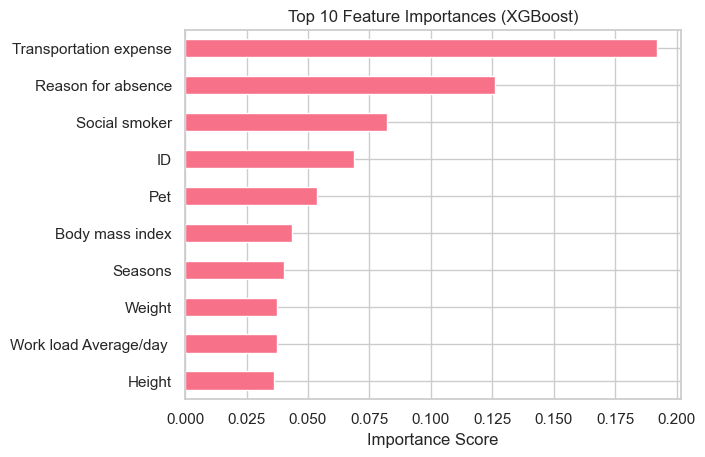

In [56]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
# Get feature importance scores
importances = xgb.feature_importances_

# Match feature indices with actual column names
feature_names = X_train.columns
importance_dict = dict(zip(feature_names, importances))

sorted_importance = pd.Series(importance_dict).sort_values(ascending=False)[:10]
sorted_importance.plot(kind='barh')
plt.xlabel('Importance Score')
plt.title('Top 10 Feature Importances (XGBoost)')
plt.gca().invert_yaxis()
plt.show()


SHAP for model Interpretability

In [57]:
!pip install shap


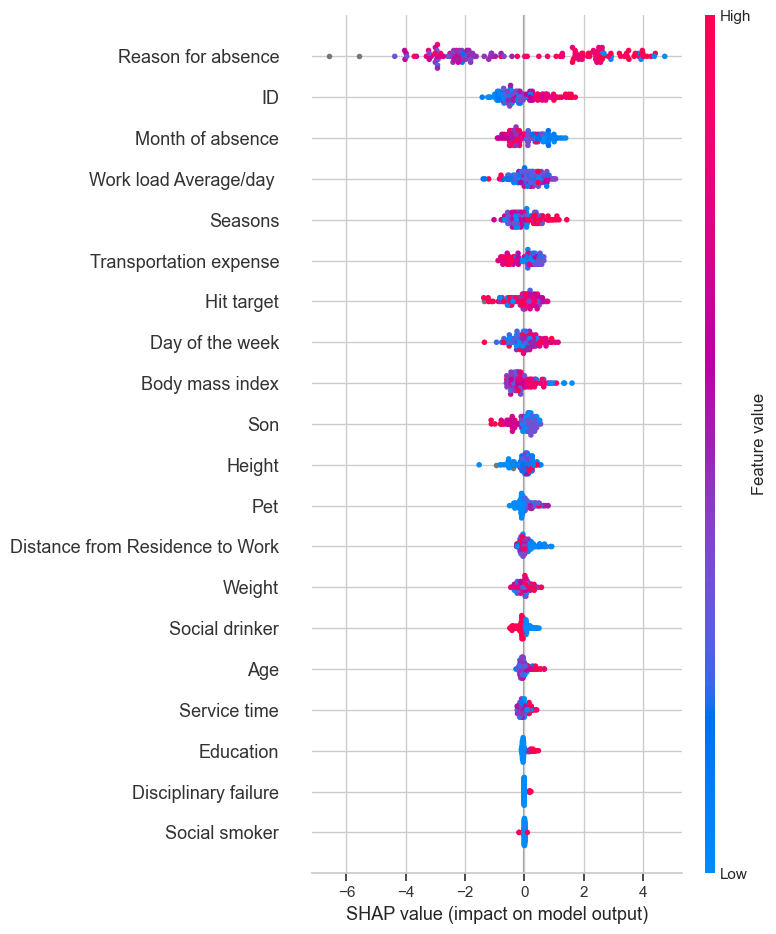

In [58]:
import shap

# Create an explainer using the trained XGBoost model
explainer = shap.Explainer(xgb, X_train_scaled)

# Calculate SHAP values for the test set
shap_values = explainer(X_test_scaled)

# Plot summary
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)



- If a red dot is far to the right, it means a high value of that feature pushed the model to predict "High absenteeism".
- If a blue dot is far to the left, it means a low value of that feature pushed the model to predict "Low absenteeism".

In [59]:
from sklearn.preprocessing import LabelEncoder

# Initialize and fit encoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Then split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Fit GridSearchCV with XGBoost
from sklearn.model_selection import GridSearchCV
xgb = XGBClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

grid = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1)
grid.fit(X_train_scaled, y_train)


# Predict and Decode
y_pred = grid.best_estimator_.predict(X_test_scaled)

y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Evaluate
print(classification_report(y_test_labels, y_pred_labels))
print(confusion_matrix(y_test_labels, y_pred_labels))



Fitting 3 folds for each of 96 candidates, totalling 288 fits
              precision    recall  f1-score   support

        High       0.70      0.82      0.76        66
         Low       0.82      0.71      0.76        78

    accuracy                           0.76       144
   macro avg       0.76      0.76      0.76       144
weighted avg       0.77      0.76      0.76       144

[[54 12]
 [23 55]]


- Accuracy: 76% — this is a balanced and strong score, especially given that the classes were previously imbalanced.
- Precision (High): 70%
- Recall (High): 82%

The model is very good at detecting High absenteeism, though some Low cases are misclassified as High.

- Precision (Low): 82%
- Recall (Low): 71%

Slightly more conservative at predicting Low absenteeism.

KEY IMPROVEMENTS FROM THE UNADJUSTED XGB MODEL

- Higher recall for "High" absenteeism (from 76% - 82%)
- Better balance between classes using GridSearchCV.
- Slight drop in precision, but acceptable trade-off considering recall gain.
- Still strong overall accuracy and macro F1 score.

In [64]:
# Save the model
import joblib
joblib.dump(grid.best_estimator_, 'xgb_absenteeism_model.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(X_train.columns.tolist(), 'feature_columns.pkl')
joblib.dump(X_train, 'background_df.pkl')



['background_df.pkl']

In [61]:
from transformers import pipeline

qa = pipeline("question-answering")
result = qa(question="What is Streamlit?", context="Streamlit is a tool to build data apps easily.")
print(result)


No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


Device set to use cpu


{'score': 0.4008323848247528, 'start': 13, 'end': 45, 'answer': 'a tool to build data apps easily'}


MODEL VISUALIZATION ON TABLEAU

In [62]:
label_map = {0: 'High', 1: 'Low'}

# Convert y_test and y_pred to pandas Series before mapping
y_test_labels = pd.Series(y_test).map(label_map)
y_pred_labels = pd.Series(y_pred).map(label_map)

# Convert X_test to DataFrame
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=[f"feature_{i}" for i in range(X_test.shape[1])])

# Combine everything into a single DataFrame
tableau_df = X_test.copy()
tableau_df['Actual_Class'] = y_test_labels.values
tableau_df['Predicted_Class'] = y_pred_labels.values

# Save to CSV for Tableau
tableau_df.to_csv("tableau_export_absenteeism.csv", index=False)

print("Data exported for Tableau: 'tableau_export_absenteeism.csv'")

Data exported for Tableau: 'tableau_export_absenteeism.csv'
